In [1]:
import pandas as pd        # for data manipulation
import numpy as np         # for mathematical calculations
import seaborn as sns      # for data visualization

import matplotlib.pyplot as plt  #for graphical analysis
%matplotlib inline

from scipy.stats import zscore # to remove outliers

from sklearn.preprocessing import StandardScaler  # for normalize the model
from sklearn.preprocessing import LabelEncoder  # to convert object into int


from sklearn.model_selection import train_test_split  # for train and test model

import warnings                      # to ignore any warnings
warnings.filterwarnings("ignore")

from sklearn import metrics  # for model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
data=pd.read_csv('Telecom_customer_churn.csv')  # read the data
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
# Check the columns names
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
#first drop unnessesary column then remove duplicates & recheck the size
data=data.drop(columns=['customerID'],axis=1)

data.drop_duplicates(inplace=True)

print(data.shape)

(7021, 20)


In [5]:
# check the no. of rows & column & finding the count of missing value
print(data.isna().sum())

#printing the summary of data type
data.info() 

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetServ

No null values are present and object or categorical data is present 

In [6]:
# Lets understand data at high level check the stastics of dataset
data.describe(include='all')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7021,7021.000000,7021,7021,7021.000000,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021.000000,7021,7021
unique,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,3541,NaN,3619,4911,NaN,6339,3368,3090,3490,3080,3087,3465,2802,2777,3853,4161,2359,NaN,11,5164
mean,NaN,0.162512,NaN,NaN,32.469449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.851894,NaN,NaN
std,NaN,0.368947,NaN,NaN,24.534965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.069001,NaN,NaN
min,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.750000,NaN,NaN
50%,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.400000,NaN,NaN
75%,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.900000,NaN,NaN


Observations: 1) null vallues are not present 2) most of columns we have skwed data values 3)we have categorical data type(object type) 4)There are some variables which contain the null values character ‘ ’

In [7]:
# Find the ' ' in all the features
unkonwn={}
for i in list(data.columns):
    if (data[i]).dtype==object:
        a=np.sum(data[i]==" ")
        unkonwn[i]=a
unkonwn=pd.DataFrame.from_dict(unkonwn,orient='index')
unkonwn

,0
gender,0
Partner,0
Dependents,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0
DeviceProtection,0
TechSupport,0


 We can see in Total charges there are 11 positions are blank lets deal it with mean method

In [8]:
# Lets frist fill blank space with nan

data["TotalCharges"]=data["TotalCharges"].replace(" ",np.NaN)

In [9]:
# Lets check with isna method after filling blank space with NAN
data.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
data["TotalCharges"].mode()

0    19.75
dtype: object

In [11]:
# Using Mode method to fill null values
data["TotalCharges"]=data["TotalCharges"].replace('NaN','19.75')

In [12]:
# lets check again
unkonwn={}
for i in list(data.columns):
    if (data[i]).dtype==object:
        a=np.sum(data[i]=="")
        unkonwn[i]=a
unkonwn=pd.DataFrame.from_dict(unkonwn,orient='index')
unkonwn

,0
gender,0
Partner,0
Dependents,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0
DeviceProtection,0
TechSupport,0


In [13]:
# Drop the nan rows & check the data shape again
data=data.dropna()

data.shape

(7010, 20)

Now NUll values are treated lets move further

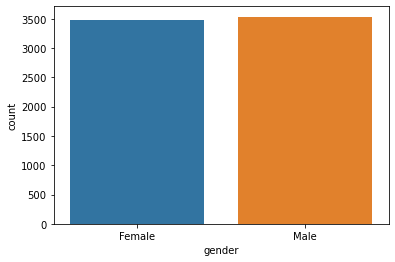

In [14]:
#plot each class frequency
sns.countplot(x='gender',data=data)
plt.show()

From above count plot we can see there are male and female equal customer

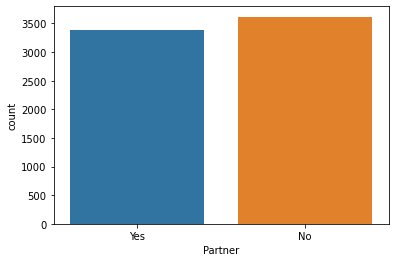

In [15]:
#plot each class frequency
sns.countplot(x='Partner',data=data)
plt.show()

Count of partner is around 3400

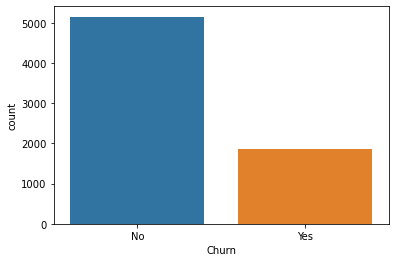

In [16]:
#plot each class frequency
sns.countplot(x='Churn',data=data)
plt.show()

There are more than 5000 customers has stop doing business with that company and almost 2000 customer are connected to that company

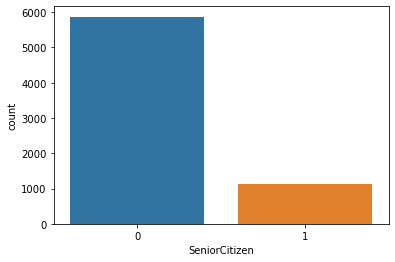

In [17]:
#plot each class frequency
sns.countplot(x='SeniorCitizen',data=data)
plt.show()

there are most of customer are senior citizens than the younger one

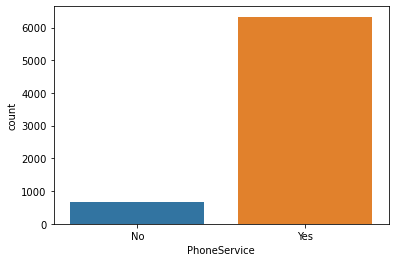

In [18]:
sns.countplot(x='PhoneService',data=data)
plt.show()

Most of the people are using phone sercives around 6100

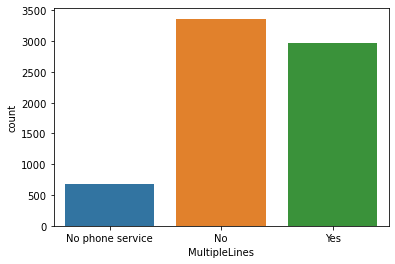

In [19]:
#plot each class frequency
sns.countplot(x='MultipleLines',data=data)
plt.show()

there are 600 customer who is not using phone services, also around 3400 customers are not using any serices & around 3000 customers are using multiplelines

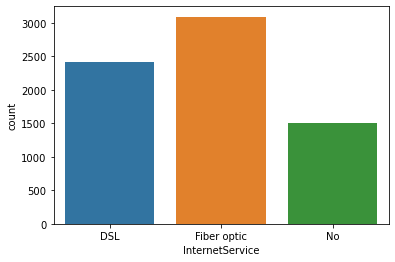

In [20]:
#plot each class frequency
sns.countplot(x='InternetService',data=data)
plt.show()

2400 customers are using DSL internate services & 3000 are customers who uses Fiber optic internte service

<AxesSubplot:xlabel='Churn', ylabel='SeniorCitizen'>

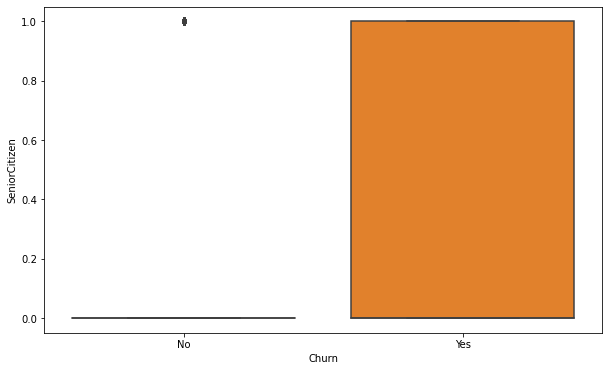

In [21]:
#Bivariant graph
plt.figure(figsize =(10, 6))
sns.boxplot(y ='SeniorCitizen', x ='Churn', data = data)

From graph we can see there are almost all seniorcitizens are stop doing buisness with company

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

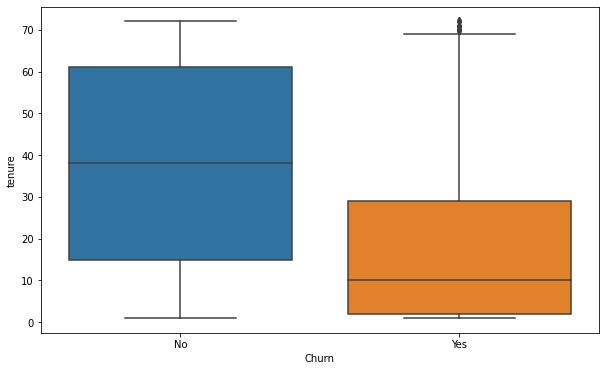

In [22]:
#Bivariant graph
plt.figure(figsize =(10, 6))
sns.boxplot(y ='tenure', x ='Churn', data = data)

As we have lots of categorical data lets convert into numerical by using encoding tech.

In [23]:
# Lets frist covert categorical data into int 
label = LabelEncoder()
df=label.fit_transform(data['gender'])
pd.Series(df)
data["gender"]=df

In [24]:
df=label.fit_transform(data['SeniorCitizen'])
pd.Series(df)
data["SeniorCitizen"]=df

In [25]:
df=label.fit_transform(data['Partner'])
pd.Series(df)
data["Partner"]=df

In [26]:
df=label.fit_transform(data['Dependents'])
pd.Series(df)
data["Dependents"]=df

In [27]:
df=label.fit_transform(data['PhoneService'])
pd.Series(df)
data["PhoneService"]=df

In [28]:
df=label.fit_transform(data['Churn'])
pd.Series(df)
data["Churn"]=df

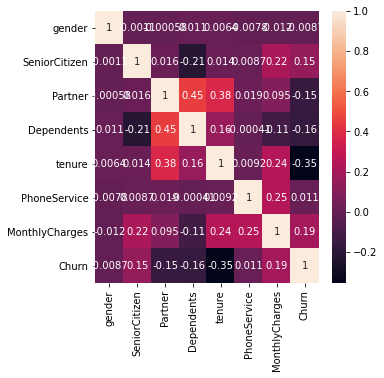

In [29]:
#check multicolinearity
plt.figure(figsize=(5,5))
sns.heatmap(data.corr(),annot=True,annot_kws={'size':10})
plt.show()

we see there is no colinarity present in the dataset lets move further for preprocessing tech 

In [30]:
# Lets check the skewness
data.skew()

gender           -0.017123
SeniorCitizen     1.827450
Partner           0.063955
Dependents        0.876026
tenure            0.233740
PhoneService     -2.723862
MonthlyCharges   -0.225686
TotalCharges      0.958322
Churn             1.065722
dtype: float64

As we see the skewed data is present aas per thumb rule +0.5/-0.5 pvalue lets work on that by using power transform

In [31]:
# Separate the skewed columns
df1=['PhoneService','SeniorCitizen','TotalCharges']

In [32]:
# Using power transformation to remove skewed data
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
data[df1]=pt.fit_transform(data[df1].values)

In [33]:
data[df1] # rechek data

,PhoneService,SeniorCitizen,TotalCharges
0,-3.051036,-0.440921,-1.821071
1,0.327757,-0.440921,0.249137
2,0.327757,-0.440921,-1.396348
3,-3.051036,-0.440921,0.228018
4,0.327757,-0.440921,-1.258758
...,...,...,...
7038,0.327757,-0.440921,0.291631
7039,0.327757,-0.440921,1.566458
7040,-3.051036,-0.440921,-0.867324
7041,0.327757,2.267980,-0.930586


In [34]:
data.shape

(7010, 20)

In [35]:
# lets seaprate the catogorical data & numirical data
numerics=['int8','int16','int32','int64','float16','float32','float64']
cat_col=[] #empty list
features=data.columns.values.tolist()
for i in features:
    if data[i].dtype in numerics:
        continue
    cat_col.append(i)
cat_col

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [36]:
# Lets use encoding technique to convert categorical data in to numeric by using dummies method
df_dummies=pd.get_dummies(data[cat_col],drop_first=True)
data=data.join(df_dummies) #join to orignal dataset


In [37]:
data.drop(columns=(cat_col),axis=1,inplace=True) # drop the orignal data
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-0.440921,1,0,1,-3.051036,29.85,-1.821071,0,1,...,0,0,0,0,0,0,1,0,1,0
1,1,-0.440921,0,0,34,0.327757,56.95,0.249137,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,-0.440921,0,0,2,0.327757,53.85,-1.396348,1,0,...,0,0,0,0,0,0,1,0,0,1
3,1,-0.440921,0,0,45,-3.051036,42.30,0.228018,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,-0.440921,0,0,2,0.327757,70.70,-1.258758,1,0,...,0,0,0,0,0,0,1,0,1,0


In [38]:
data.shape

(7010, 31)

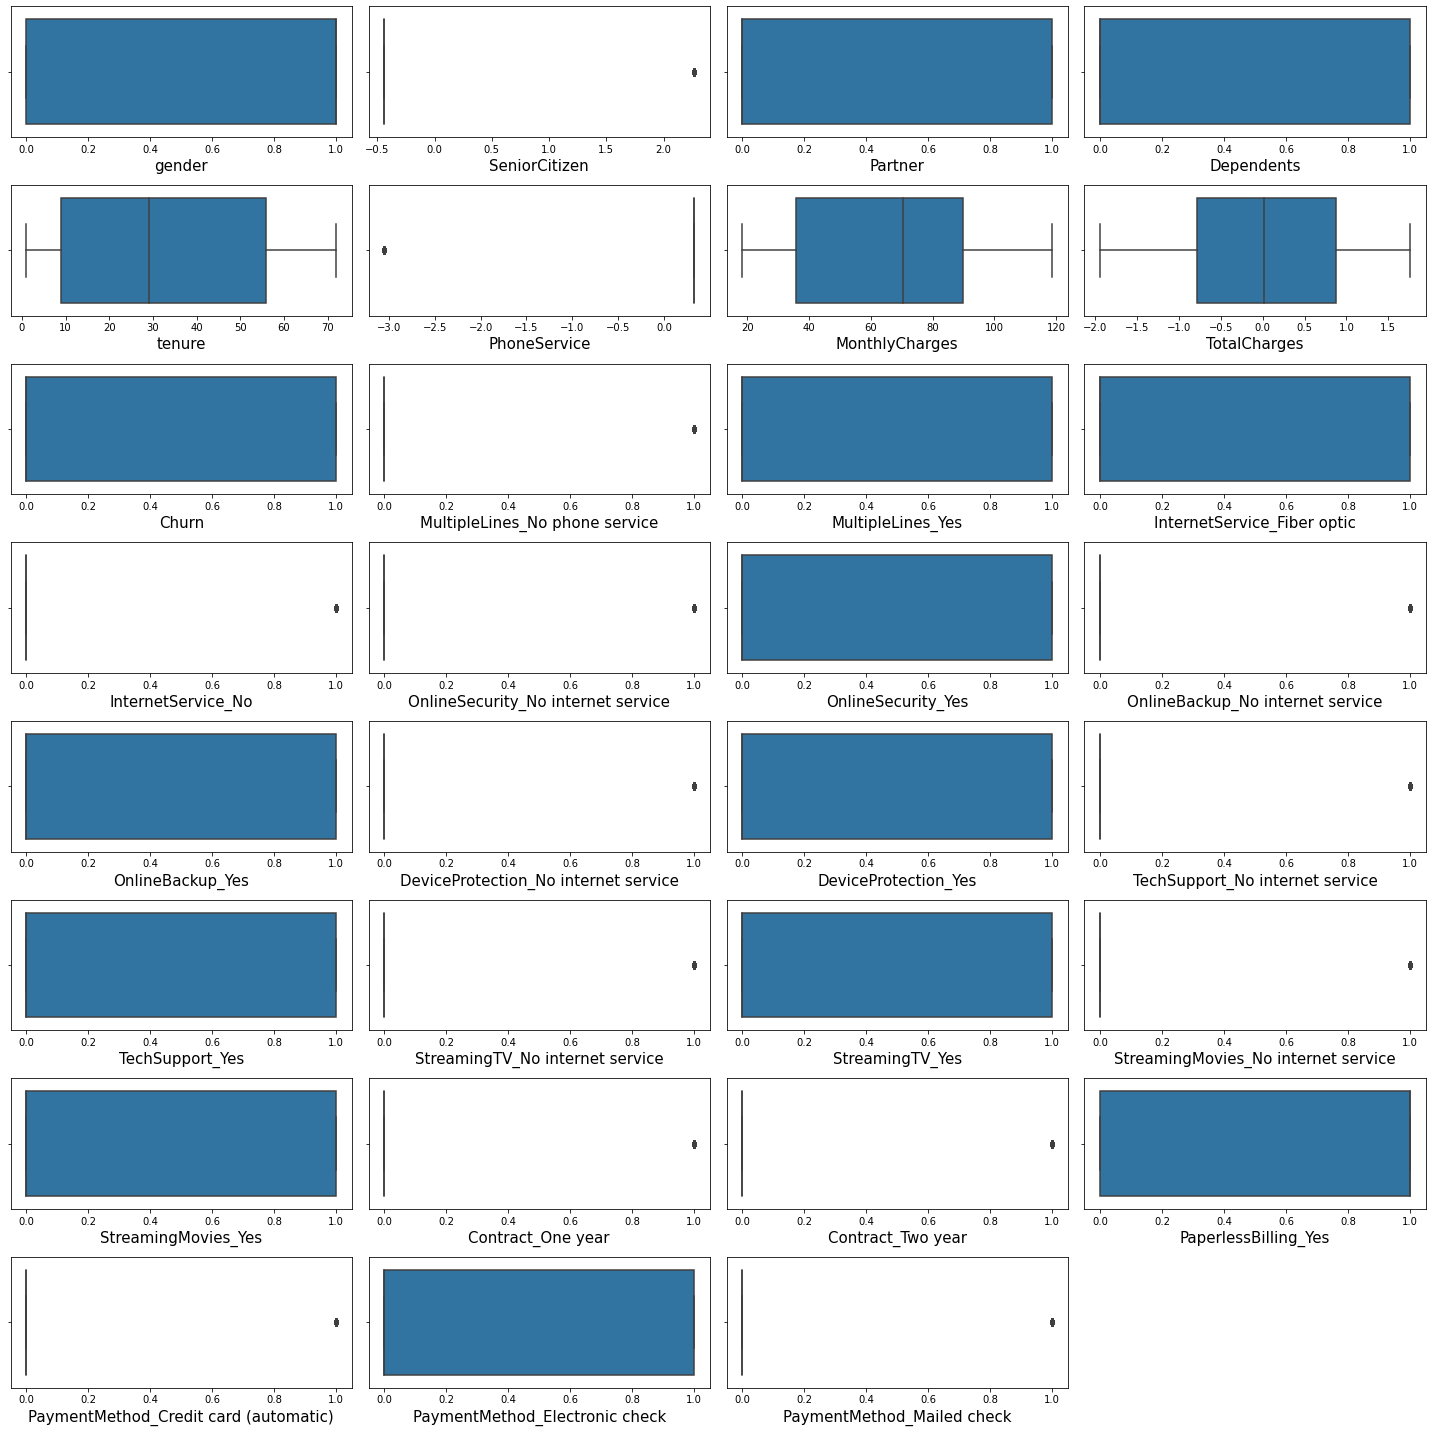

In [39]:
#Let's see the outliers in the dataset by using box plot or Graphical analysis of all features
myFig=plt.figure(figsize=(20,20))
plotnumber=1
for column in data:
    if plotnumber<=32:
        ax=plt.subplot(8,4,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

from above graph we can see there is no outliers are present in the columns now lets separate the data for build the model

In [40]:
# Let's Seperate the data & visulize the relation between featurs & lable
x=data.drop(columns=['Churn'])
y=data['Churn']

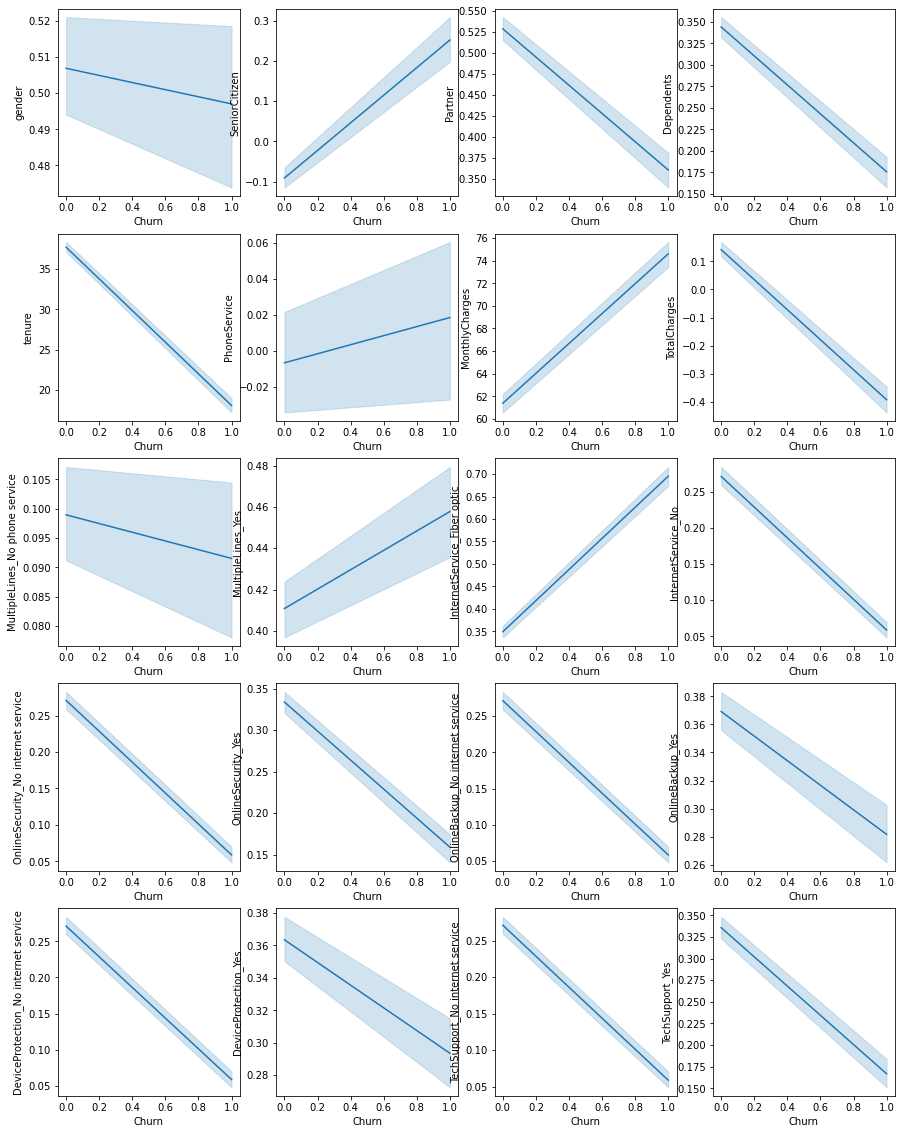

In [41]:
# see how featurs r related to lable(Graphical Univariate Analysis)
plt.figure(figsize=(15,20))
plotnumber=1
for column in x:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.lineplot(y,x[column])
    plotnumber+=1
plt.show()

In [42]:
print(data['Churn'].value_counts()) # data is imbalanced lets use SMOTE

0    5153
1    1857
Name: Churn, dtype: int64


In [43]:
# data stadardization
scale=StandardScaler()
x_scaled=scale.fit_transform(x)

In [44]:
# Lets select the proper random state to build best model by using LogisticRegression

from sklearn.linear_model import LogisticRegression
LR= LogisticRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=i)
    LR.fit(x_train,y_train)
    y_pred=LR.predict(x_train)
    pred=LR.predict(x_test)
    print(f"at random sate {i}, the training accuracy is:- {accuracy_score(y_train,y_pred)}")
    print(f"at random sate {i}, the testing accuracy is:- {accuracy_score(y_test,pred)}")
    print("\n")

at random sate 0, the training accuracy is:- 0.8096596698593845
at random sate 0, the testing accuracy is:- 0.8074179743223966


at random sate 1, the training accuracy is:- 0.8104748318728348
at random sate 1, the testing accuracy is:- 0.8036138849262958


at random sate 2, the training accuracy is:- 0.8121051558997351
at random sate 2, the testing accuracy is:- 0.7993342843556823


at random sate 3, the training accuracy is:- 0.809455879356022
at random sate 3, the testing accuracy is:- 0.81169757489301


at random sate 4, the training accuracy is:- 0.8114937843896475
at random sate 4, the testing accuracy is:- 0.7998097955301949


at random sate 5, the training accuracy is:- 0.809455879356022
at random sate 5, the testing accuracy is:- 0.8017118402282454


at random sate 6, the training accuracy is:- 0.8096596698593845
at random sate 6, the testing accuracy is:- 0.8102710413694721


at random sate 7, the training accuracy is:- 0.8086407173425718
at random sate 7, the testing accurac

at random sate 65, the training accuracy is:- 0.8114937843896475
at random sate 65, the testing accuracy is:- 0.8002853067047075


at random sate 66, the training accuracy is:- 0.8106786223761973
at random sate 66, the testing accuracy is:- 0.8007608178792202


at random sate 67, the training accuracy is:- 0.8147544324434481
at random sate 67, the testing accuracy is:- 0.7941036614360437


at random sate 68, the training accuracy is:- 0.8096596698593845
at random sate 68, the testing accuracy is:- 0.802187351402758


at random sate 69, the training accuracy is:- 0.8100672508661096
at random sate 69, the testing accuracy is:- 0.8074179743223966


at random sate 70, the training accuracy is:- 0.8133278989199103
at random sate 70, the testing accuracy is:- 0.7945791726105563


at random sate 71, the training accuracy is:- 0.8123089464030976
at random sate 71, the testing accuracy is:- 0.8002853067047075


at random sate 72, the training accuracy is:- 0.8092520888526594
at random sate 72, 

at 57random state there is good accuarcy so lets select the 57 random state and lets split the data again

In [45]:
#Lets Split data  again into train & test by using this random state
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=57)

In [46]:
# Lets use of Resampling Techniques to handle Imbalanced Data 
from imblearn.over_sampling import SMOTE
from collections import Counter

ove_smp=SMOTE(0.90)
x_train_ns,y_train_ns=ove_smp.fit_sample(x_train,y_train)
print(Counter(y_train))
print(Counter(y_train_ns))

Counter({0: 3607, 1: 1300})
Counter({0: 3607, 1: 3246})


# Lets build the model to predict the Churn

In [47]:
def print_score(model,x_train_ns,x_test,y_train_ns,y_test,train=True):
    if train:
        y_pred=model.predict(x_train_ns)
        print("Train Report:",accuracy_score(y_train_ns,y_pred))
    elif train==False:
        pred=model.predict(x_test)
        print("Test Report:",accuracy_score(y_test,pred))
        print("Classification Report:",classification_report(y_test,pred))
        print("Confusion Matrix:",confusion_matrix(y_test,pred))

In [48]:
#Below is a function to find the accuracy of each model on the basis of K-fold cross validation.
from sklearn.model_selection import cross_val_score

def model_accuracy(model,X_train=x_train_ns,y_train=y_train_ns):
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv =2)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [49]:
# Model no.1
from sklearn.linear_model import LogisticRegression

LR= LogisticRegression()
LR.fit(x_train_ns,y_train_ns)

print_score(LR,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(LR,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(LR)

Train Report: 0.7781993287611265
Test Report: 0.7755587256300523
Classification Report:               precision    recall  f1-score   support

           0       0.91      0.77      0.84      1546
           1       0.55      0.78      0.65       557

    accuracy                           0.78      2103
   macro avg       0.73      0.78      0.74      2103
weighted avg       0.81      0.78      0.79      2103

Confusion Matrix: [[1197  349]
 [ 123  434]]
Accuracy: 77.44 %
Standard Deviation: 0.17 %


In [50]:
# Model no.2
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train_ns,y_train_ns)

print_score(svc,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(svc,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(svc)


Train Report: 0.8294177732379979
Test Report: 0.7703281027104137
Classification Report:               precision    recall  f1-score   support

           0       0.88      0.79      0.84      1546
           1       0.55      0.71      0.62       557

    accuracy                           0.77      2103
   macro avg       0.72      0.75      0.73      2103
weighted avg       0.80      0.77      0.78      2103

Confusion Matrix: [[1223  323]
 [ 160  397]]
Accuracy: 79.25 %
Standard Deviation: 0.73 %


In [51]:
#Model no.3
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()

dt.fit(x_train_ns,y_train_ns)

print_score(dt,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(dt,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(dt)

Train Report: 0.998540785057639
Test Report: 0.7042320494531622
Classification Report:               precision    recall  f1-score   support

           0       0.82      0.76      0.79      1546
           1       0.45      0.54      0.49       557

    accuracy                           0.70      2103
   macro avg       0.64      0.65      0.64      2103
weighted avg       0.72      0.70      0.71      2103

Confusion Matrix: [[1178  368]
 [ 254  303]]
Accuracy: 75.84 %
Standard Deviation: 1.72 %


In [52]:
#Model no.4
from sklearn.ensemble import AdaBoostClassifier

ada=AdaBoostClassifier()

ada.fit(x_train_ns,y_train_ns)

print_score(ada,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(ada,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(ada)

Train Report: 0.8140960163432074
Test Report: 0.7769852591535901
Classification Report:               precision    recall  f1-score   support

           0       0.90      0.79      0.84      1546
           1       0.56      0.74      0.64       557

    accuracy                           0.78      2103
   macro avg       0.73      0.77      0.74      2103
weighted avg       0.81      0.78      0.79      2103

Confusion Matrix: [[1220  326]
 [ 143  414]]
Accuracy: 79.34 %
Standard Deviation: 2.13 %


In [53]:
# Model no.5
from sklearn.ensemble import RandomForestClassifier

rand_clf= RandomForestClassifier()
rand_clf.fit(x_train_ns,y_train_ns)

print_score(rand_clf,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(rand_clf,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(rand_clf)

Train Report: 0.9983948635634029
Test Report: 0.7850689491203043
Classification Report:               precision    recall  f1-score   support

           0       0.85      0.86      0.86      1546
           1       0.60      0.57      0.58       557

    accuracy                           0.79      2103
   macro avg       0.72      0.72      0.72      2103
weighted avg       0.78      0.79      0.78      2103

Confusion Matrix: [[1333  213]
 [ 239  318]]
Accuracy: 82.10 %
Standard Deviation: 3.34 %


In [54]:
#Model no.6
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()

knn.fit(x_train_ns,y_train_ns)

print_score(knn,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(knn,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(knn)

Train Report: 0.8545162702466074
Test Report: 0.7118402282453637
Classification Report:               precision    recall  f1-score   support

           0       0.88      0.71      0.78      1546
           1       0.47      0.73      0.57       557

    accuracy                           0.71      2103
   macro avg       0.68      0.72      0.68      2103
weighted avg       0.77      0.71      0.73      2103

Confusion Matrix: [[1090  456]
 [ 150  407]]
Accuracy: 77.47 %
Standard Deviation: 1.46 %


# lets check ROC AUC curve on train data

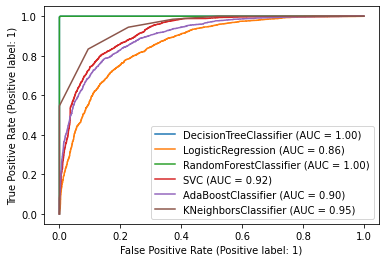

In [55]:
from sklearn.metrics import roc_curve,roc_auc_score, plot_roc_curve

disp=plot_roc_curve(dt,x_train_ns,y_train_ns)
plot_roc_curve(LR,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(rand_clf,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(svc,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(ada,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(knn,x_train_ns,y_train_ns,ax=disp.ax_)

# lets check ROC AUC curve on test data

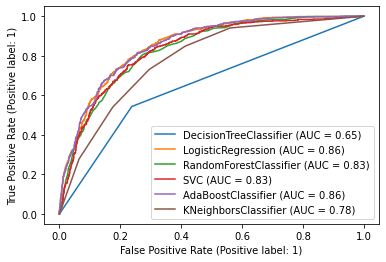

In [56]:
disp=plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(LR,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rand_clf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(ada,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)


Looking at the accuracy and ROC curve of train & test data i m selecting AdaBoostClassifier lets check with RandomisedserachCV hyper tuning parameter for better accuracy

In [57]:
# Hyper tuning by using RandomizedSearchCV With AdaBosstClassifier
from sklearn.model_selection import RandomizedSearchCV

para={'n_estimators':range(2,60,2),'learning_rate':[0.25,0.1,0.3,0.4],'random_state':range(0,100,2)}
rand=RandomizedSearchCV(estimator=ada, cv=2,param_distributions=para)
rand.fit(x_train_ns,y_train_ns)

rand.best_params_

{'random_state': 0, 'n_estimators': 52, 'learning_rate': 0.25}

In [58]:
#Model no.4
from sklearn.ensemble import AdaBoostClassifier

ada=AdaBoostClassifier(random_state=0,n_estimators=52, learning_rate= 0.25,base_estimator=ada)

ada.fit(x_train_ns,y_train_ns)

print_score(ada,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(ada,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(ada)

Train Report: 0.8183277396760543
Test Report: 0.7826913932477413
Classification Report:               precision    recall  f1-score   support

           0       0.90      0.79      0.84      1546
           1       0.57      0.76      0.65       557

    accuracy                           0.78      2103
   macro avg       0.73      0.77      0.75      2103
weighted avg       0.81      0.78      0.79      2103

Confusion Matrix: [[1224  322]
 [ 135  422]]
Accuracy: 79.13 %
Standard Deviation: 2.13 %


# Lets Check Curve again after hyper tune parameter RandomisedearchCV on tarin data

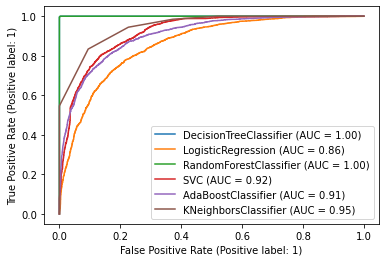

In [59]:
disp=plot_roc_curve(dt,x_train_ns,y_train_ns)
plot_roc_curve(LR,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(rand_clf,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(svc,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(ada,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(knn,x_train_ns,y_train_ns,ax=disp.ax_)

# Lets Check Curve again after hyper tune parameter RandomisedearchCV on test data

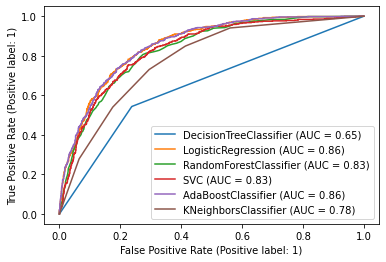

In [60]:
disp=plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(LR,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rand_clf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(ada,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)


# Based on accuracy, classification report & roc_auc curve best model is Adaboostclassifer with RandomisedsearchCV hypertune parameter.

In [61]:
#save model
import pickle
Filename='Finalized_model_Customer_churn.pickle'
pickle.dump(ada,open(Filename,'wb'))